In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join('..', 'src')))

In [2]:
import data_load

# print (data_load.get_data_path())
# /home/viliam/dev/FIIT/oznal/data

In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

# Dátová analýza

- [X] Počet atribútov: 13
- [X] Celkový počet záznamov: 129971
- [X] Počet unikátnych záznamov: 119988
- [X] Počet riadkov kde chýbajú niektoré atribúty

## Numerické attr.
- Tie máme dva: points a price.
    - [X] Distribuciu, odchylku, ...
    - [X] rozdelenie bodov.

## Textové attr.
- Zistiť
    - [ ] pocetnost: napr. kolko zaznamov je z country, variety, winery, province, region, taster
    - [X] kolko zaznamov obsahuje vsetky atributy, ktore podtrebujeme: description+points+price+...
    - [X] odfiltrovat len unikatne descriptions
- Analyzovat description
    - [ ] histogram slov
    - [ ] Počet znakov v `description`,
    - ...
- todo

## Závislosti
- Preskúmať
    - [ ] napr. závislosť/vývoj country od ceny, alebo taster od points
    - [ ] taster a jeho distribucia bodov - ako vybraný `taster_twitter_handle` priďeľú body, teda či niekto je biasnutý

### Škála (kategórie) hodnotenia vín

| Points | Desc                |
| :----- | :------------------ |
| 98–100 | Classic The pinnacle of quality.
| 94–97  | Superb A great achievement.
| 90–93  | Excellent Highly recommended.
| 87–89  | Very Good Often good value; well recommended.
| 83–86  | Good Suitable for everyday consumption; often good value.
| 80–82  | Acceptable Can be employed in casual, less-critical circumstances.

_dostupná na webe: https://www.winemag.com/buying-guide_

In [54]:
df = pd.read_csv('../data/raw/winemag-data-130k-v2.csv', index_col=0)

In [99]:
print( "Počet záznamov %d a z toho je %d unikátnych" % ( len(df), len(df.drop_duplicates()) ) )

Počet záznamov 129971 a z toho je 119988 unikátnych


In [101]:
df.isnull().sum() # koľko hodnôt v stľpci _ je NaN

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
points_group                 0
dtype: int64

In [98]:
def points2group(row):
    """
    Convert points to its group from WineMag
    """
    if row['points'] >= 80 and row['points'] <= 82:
        return '80-82'
    if row['points'] >= 83 and row['points'] <= 86:
        return '83-86'
    if row['points'] >= 87 and row['points'] <= 89:
        return '87-89'
    if row['points'] >= 90 and row['points'] <= 93:
        return '90-93'
    if row['points'] >= 94 and row['points'] <= 97:
        return '94-97'
    if row['points'] >= 98 and row['points'] <= 100:
        return '98-100'    
    return 'UNKNOWN'

df['points_group'] = df.apply(points2group, axis=1)

In [104]:
pg = df['points_group'].sort_values()

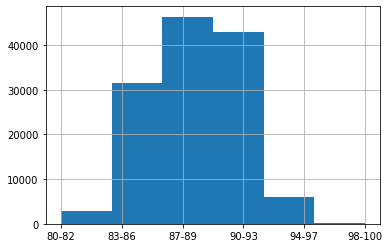

In [106]:
plt = pg.hist(bins=df['points_group'].nunique())
plt.get_figure().savefig('../figures/points_group_histogram.eps')

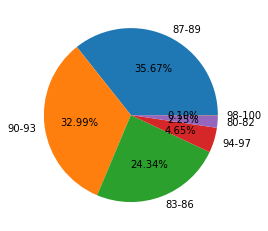

In [107]:
plt = pg.value_counts().plot.pie(legend=False, autopct='%.2f%%', shadow=False)
plt.set_ylabel('')
plt.get_figure().savefig('../figures/points_group_pie.eps')

In [108]:
del pg

In [109]:
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points_group
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,87-89
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,87-89
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,87-89
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,87-89
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,87-89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),90-93
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,90-93
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,90-93
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,90-93


In [53]:
df.dtypes 

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
WordCount                  int64
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [4]:
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


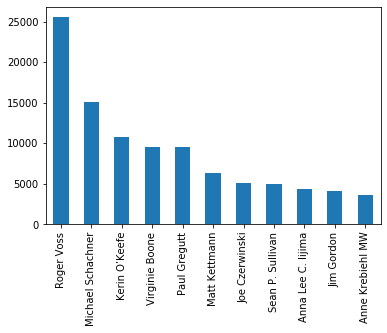

In [123]:
plt.figure()
dfaxes = df['taster_name'].value_counts().head(11).plot.bar()
dfaxes.get_figure().savefig('../figures/taster_name.eps')
plt.show()

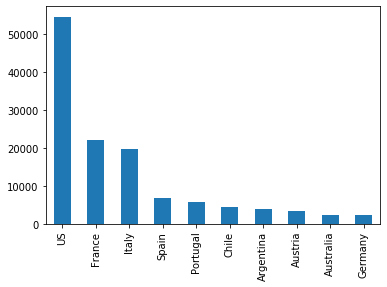

In [122]:
plt.figure()
axes = df['country'].value_counts().head(10).plot.bar()
axes.get_figure().savefig('../figures/countries.eps')
plt.show()

In [6]:
text = ' '.join(df['description'])

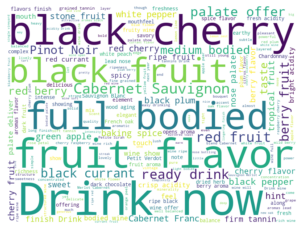

In [7]:
wordcloud = WordCloud(
    width=800,
    height=600,
    background_color='white',
    random_state = 42,
    # stopwords=stopwords,
    min_word_length=2,
)
wordcloud.generate(text)
wordcloud.to_file('../figures/wordcloud.png')

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
df.duplicated(subset=None, keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
129966    False
129967    False
129968    False
129969    False
129970    False
Length: 129971, dtype: bool

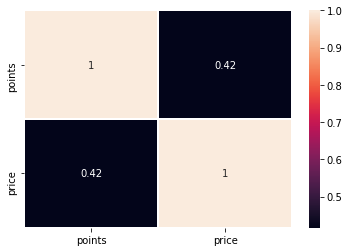

In [9]:
sns.heatmap(df.corr(), annot=True, linewidths=.5)

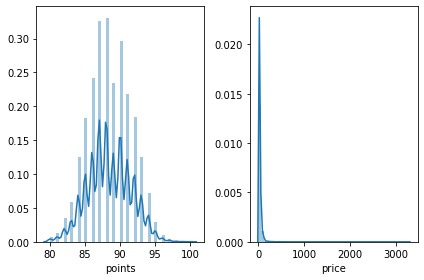

In [124]:
plt.figure()
plt.subplot(1, 2, 1); sns.distplot(df['points'])
plt.subplot(1, 2, 2); sns.distplot(df['price'])

plt.tight_layout()
plt.savefig('../figures/points_price_distplot.png')
plt.show()

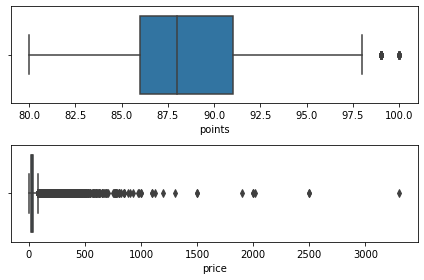

In [118]:
plt.figure()
plt.subplot(2, 1, 1); sns.boxplot('points', data=df)
plt.subplot(2, 1, 2); sns.boxplot('price', data=df)

plt.tight_layout()
plt.savefig('../figures/points_price_boxplot.eps')
plt.show()

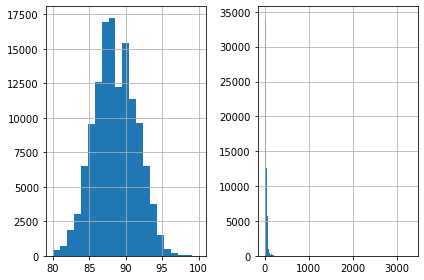

In [119]:
plt.figure()
plt.subplot(1, 2, 1); df['points'].hist(bins=df['points'].nunique())
plt.subplot(1, 2, 2); df['price'].hist(bins=df['price'].nunique())
plt.tight_layout()
plt.show()

In [102]:
corr = df.corr()
corr

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


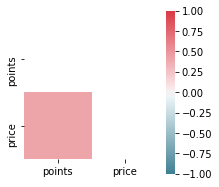

In [103]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(3, 3))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True)

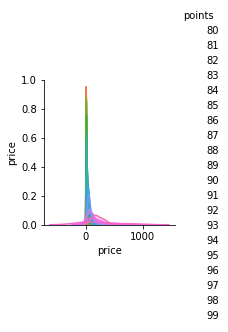

In [132]:
plt = sns.pairplot(df.sample(n=10000), hue='points')
plt.savefig('../figures/pairplot_price_points.png')

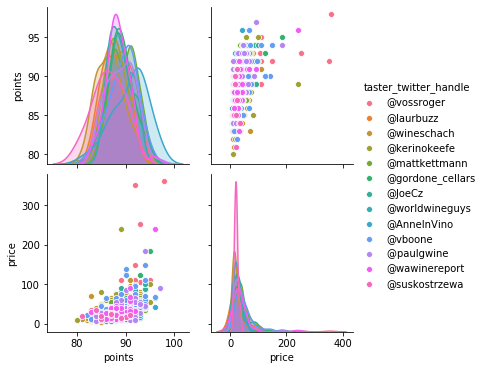

In [135]:
plt = sns.pairplot(df.sample(n=1000), hue='taster_twitter_handle') 
plt.savefig('../figures/pairplot_taster_twitter_handle.png')

/home/viliam/.virtualenvs/oznal/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/viliam/.virtualenvs/oznal/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/viliam/.virtualenvs/oznal/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/viliam/.virtualenvs/oznal/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/viliam/.virtualenvs/oznal/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home

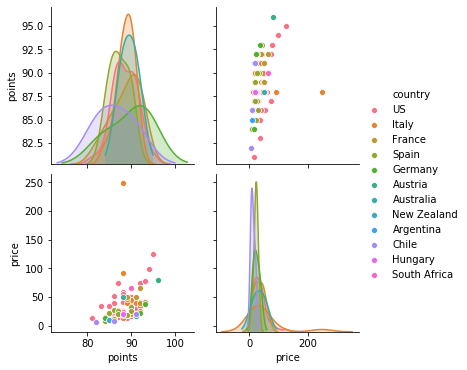

In [144]:
sns.pairplot(df.sample(n=100), hue='country')

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

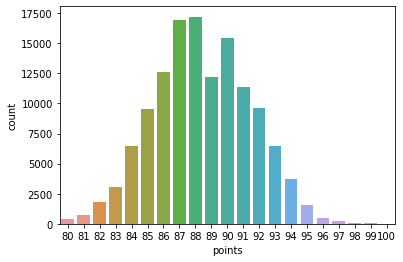

In [145]:
plt = sns.countplot(x='points', data=df) 
# plt.savefig('../figures/points_countplot.eps')

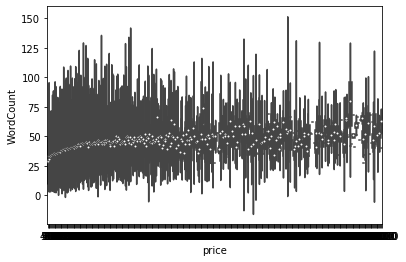

In [42]:
df['WordCount'] = df['description'].str.split().str.len()
sns.violinplot(x='price', y='WordCount', data=df) 

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

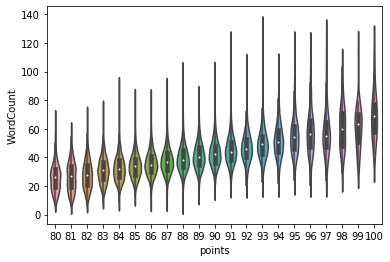

In [146]:
df['WordCount'] = df['description'].str.split().str.len()
plt = sns.violinplot(x='points', y='WordCount', data=df) 
# plt.savefig('../figures/description_word_count.eps')